In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from pyinstrument import Profiler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os
sys.path.append(os.path.dirname(os.getcwd()))
from bart_playground import *

import bartz

In [2]:
proposal_probs = {"grow" : 0.5,
                  "prune" : 0.5}
generator = DataGenerator(n_samples=160, n_features=2, noise=0.1, random_seed=42)
X, y = generator.generate(scenario="piecewise_flat")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
np.set_printoptions(suppress=True)
print(y_train[:12])

[ 0.50327821  0.60672224  0.26898966  0.55211673  0.50693811  0.66162097
 -0.64127659  0.65112284  0.03487759  0.23276531  0.44055996  0.38216964]


In [ ]:
#profiler = Profiler()
#profiler.start()
ndpost = 10000
bart = ChangeNumTreeBART(ndpost=ndpost, nskip=10000, n_trees=200, proposal_probs=proposal_probs)
bart.fit(X_train, y_train)
#profiler.stop()
#profiler.print()

Iterations: 100%|██████████| 20000/20000 [05:59<00:00, 55.61it/s] 


In [4]:
bart.trace[-1].n_trees

40

In [12]:
# Extract the n_trees value for each instance
n_trees_list = [instance.n_trees for instance in bart.trace[-ndpost:]]

# n_trees_list now contains the n_trees values for the last 500 instances
print(n_trees_list)

[56, 56, 56, 57, 57, 56, 55, 55, 56, 57, 57, 58, 59, 58, 58, 57, 57, 57, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 56, 56, 56, 55, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 55, 55, 56, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 57, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 56, 55, 56, 56, 55, 55, 56, 56, 56, 55, 55, 55, 55, 55, 54, 54, 54, 54, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 53, 53, 52, 51, 51, 51, 51, 52, 53, 53, 52, 52, 52, 51, 50, 50, 50, 50, 50, 50, 51, 51, 51, 52, 52, 52, 51, 52, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 56, 56, 56, 57, 57, 57, 57, 57, 57, 56, 55, 55, 55, 54, 53, 53, 52, 52, 51, 51, 51, 50, 51, 51, 51, 51, 50, 50, 51, 50, 50, 50, 49, 49, 50, 50, 51, 51, 51, 50, 50, 50, 49, 49, 49, 50, 51, 52, 52, 52, 52, 52, 52, 52, 53, 53, 54, 54, 54, 54, 54, 53, 53, 52, 52, 52, 52, 52, 52, 52, 51, 51, 51, 51, 51, 51, 52, 51, 51, 51, 51, 51, 51, 51,

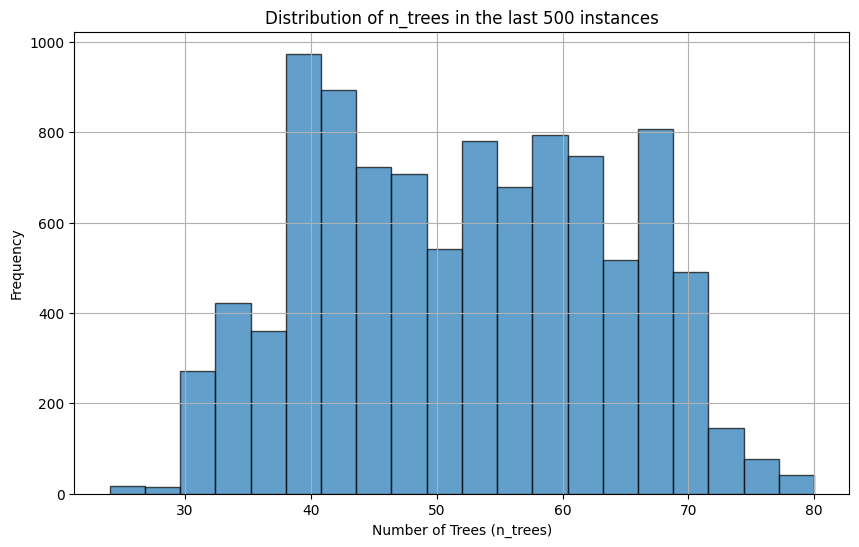

In [ ]:
# Create a histogram with bins for each integer value
plt.figure(figsize=(10, 6))
plt.hist(n_trees_list, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of n_trees in the last 500 instances')
plt.xlabel('Number of Trees (n_trees)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

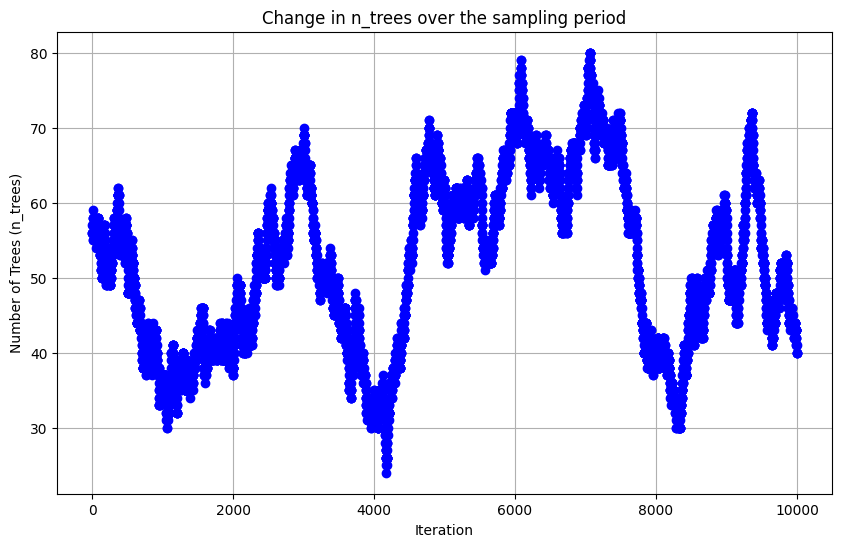

In [15]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(n_trees_list)), n_trees_list, marker='o', linestyle='-', color='b')
plt.title('Change in n_trees over the sampling period')
plt.xlabel('Iteration')
plt.ylabel('Number of Trees (n_trees)')
plt.grid(True)
plt.show()

In [8]:
bart.trace[-1].trees

[Tree(vars=[ 1 -1 -1 -2], thresholds=[0.16558937        nan        nan        nan], leaf_vals=[       nan 0.00489502 0.02380732        nan], n_vals=[120  20 100  -2]),
 Tree(vars=[ 1 -1 -1 -2], thresholds=[0.47723238        nan        nan        nan], leaf_vals=[        nan -0.01066656 -0.0044564          nan], n_vals=[120  55  65  -2]),
 Tree(vars=[ 0 -1 -1 -2], thresholds=[0.93705634        nan        nan        nan], leaf_vals=[        nan  0.0028906  -0.02068938         nan], n_vals=[120 115   5  -2]),
 Tree(vars=[ 0 -1 -1 -2], thresholds=[0.55655262        nan        nan        nan], leaf_vals=[        nan -0.00116423 -0.00724052         nan], n_vals=[120  74  46  -2]),
 Tree(vars=[ 0 -1 -1 -2], thresholds=[0.64139548        nan        nan        nan], leaf_vals=[        nan -0.01681123 -0.0059499          nan], n_vals=[120  80  40  -2]),
 Tree(vars=[ 0 -1  0 -2 -2  1 -1 -2 -2 -2 -2 -1 -1 -2 -2 -2], thresholds=[0.01393629        nan 0.47207331        nan        nan 0.68261773
    

In [17]:
ntree = bart.trace[-1].n_trees
rf = RandomForestRegressor(n_estimators=ntree)
lr = LinearRegression()
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

btz = bartz.BART.gbart(np.transpose(X_train), y_train, ntree=ntree, ndpost=200, nskip=100)
btpred_all = btz.predict(np.transpose(X_test))
btpred = np.mean(np.array(btpred_all), axis=0)

Iteration 100/300 P_grow=0.57 P_prune=0.43 A_grow=0.35 A_prune=0.41 (burnin)
Iteration 200/300 P_grow=0.62 P_prune=0.38 A_grow=0.52 A_prune=0.47
Iteration 300/300 P_grow=0.43 P_prune=0.57 A_grow=0.12 A_prune=0.30


In [10]:
models = {"bart" : bart, 
          "rf" : rf, 
          "lr" : lr,
          "btz" : btz}
results = {}
for model_name, model in models.items():
    if model_name == "btz":
        results[model_name] = mean_squared_error(y_test, btpred)
    else:
        results[model_name] = mean_squared_error(y_test, model.predict(X_test))
results

{'bart': 0.189430845433408,
 'rf': 0.02263887526128285,
 'lr': 0.048045521328019404,
 'btz': 0.02328283761397566}